# Your Final Project Title

- Vicky Xie: LMAO
- Riley Smith: put their contribution here
- Finnley O'Rourke: put their contribution here
- Kayla Katakis: ...

In [8]:
# Install Neccesary Packages

!pip install textblob
!pip install nltk 
!pip install -U textblob
!pip install bokeh

# Import Necessary Libraries

import pandas as pd
import re
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.corpus import stopwords

# Downloading and Setting Up the Stopwords Package and Stemmer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

  Using cached bokeh-3.1.1-py3-none-any.whl (8.3 MB)
  Using cached xyzservices-2023.5.0-py3-none-any.whl (56 kB)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Introduction

Our project focuses on the use of sentiment analysis and natural language processing in order to extract data from tweets regarding the Boston Marathon Bombings and Hurricane Sandy. The datasets observed looks at tweets in the aftermath of the both disasters, some of which are classified as “on topic” and others that are classified as “off-topic”. The “on-topic” tweets refer directly to the bombing or the hurricane while the “off-topic” tweets are about anything else. 
 
In order to extrapolate specific types of data from the data set our group used both VaderSentiment and TextBlob which helped create sentiment analysis scores for the various tweets. While both VaderSentiment and TextBlob are repositories that help coders perform sentiment analysis there are a few key differences that create variance within the data. 

Some of the differences between the two models include sentiment intensity vs. sentiment polarity. VaderSentimet uses a rule-based analysis in order to assign an intensity score (-1 to 1) to a given dataset. In contrast TextBlob uses a few different components like part-of-speech tagging and noun phrase extraction in order to assign a given tweet a polarity score (negative, neutral, or positive). Additionally, VaderSentiment is designed to incorporate other aspects of tweets such as emojis and capitalization which helps the program discern the level of sentiment.

# Research Questions

In this project, we will perform sentiment analysis and topic modeling to answer the following questions:
- How do Vader and TextBlob differ in creating sentiment scores for on versus off topic tweets in regards to the Boston Marathon Bombings?
- How do Vader and TextBlob differ in creating sentiment scores for on-topic tweets about man-made disasters (Boston Marathon Bombing) versus natural disasters (Hurricane Sandy)?
- What are the main topic cluster that crop up in the tweets that are ‘on-topic’ in regards to the Boston Marathon Bombings? 
- How do they compare to the ‘on-topic’ topic clusters in the Hurricane Sandy tweets?

# Dataset Description

The Boston Bombings dataset takes looks at just over 10,000 tweets that are either about the Boston Marathon bombings or about other random topics. The Boston Bombings dataset has 3 columns.

- `label` - a string that indicates whether or not the tweet/observation is about the Boston Marathon Bombings , can either be ‘on-topic’ or ‘off-topic’
- `tweet id` - a string that gives each observation a unique identifier value
- `tweet` - a string that  represents the entire text of each unique tweet

Using the describe() function, we can see the the number of values for each column (count), and how many of those values are unique (unique). Additionally, we can see the ‘top’ value, which represents the most common value , and its frequency. For this dataset, there are 10,012 tweet id’s that are all unique and 10,012 total tweets, with 9,226 of those being unique. We see that our “top” id value only has a frequency of one, which is intuitive due to the unique nature of that variable. Our “top” tweet is actually a retweet that shows up 34 times in the dataset, meaning that there is likely an original tweet that was retweeted 34 times. There are only two unique “label” values, either on-topic or off-topic, with the more common label being on-topic with a count of 5,648.

The Hurricane Sandy dataset is structured identically to the Boston Bombing dataset, with the same 3 columns. The major difference, of coursse, is that being “on-topic” now refers to tweets that are directly related to Hurricane Sandy as opposed to the Boston Marathon Bombings. 

Using the describe() function on the Hurricane Sandy dataframe, we can see that there is nearly an equal number of tweets, with Hurricane Sandy having 10,008 tweets, each with their own unique id. Of the 10,008 tweets, 9,431 are unique with two potential labels, either on or off topic, which is the same as before. Similarly to the Boston Bombing data frame, the "top" tweet in this dataset is in the form of a retweet with a frequency of 28, meaning there is a likely an original tweet, and its retweets come up 28 times in this dataset. The more common label in this dataset is on-topic with a count of 6,138.

## 2013 Boston Bombing DF

In [9]:
df=pd.read_csv("2013_Boston_Bombings-ontopic_offtopic.csv")
df.describe()

,tweet id,tweet,label
count,10012,10012,10012
unique,10012,9226,2
top,'325208201740029952',RT @DannyAmendola: I will DONATE $100 for EVER...,on-topic
freq,1,34,5648


## 2012 Sandy Hurricane DF

In [10]:
df1=pd.read_csv("2012_Sandy_Hurricane-ontopic_offtopic.csv")
df1.describe()

,tweet id,tweet,label
count,10008,10008,10008
unique,10008,9431,2
top,'262596552399396864',"RT @HurricaneSandyw: FOR EVERY 100 RETWEETS, W...",on-topic
freq,1,28,6138


# Preprocessing

Before we begin analyzing the data, we first need to clean up our `tweet` column to get rid of any unnecessary information. 
To do so, we wrote a function called clean_text() that removes URLs, hashtags, mentions, and any unnecessary whitespace from the text to make sure that only the most meaningful aspects of the text are left for analysis. 

Additionally, our research questions revolve entirely around the on-topic tweets, so we will filter our datasets to include only these tweets to make our analysis easier and more efficient. We will also drop any empty tweets from the dataset.

In [13]:
# text cleaning
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#', '', text) # remove hashtag
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

## Boston Bombing

In [41]:
# apply the function to dataframe: Boston Bombing
df['clean_text'] = df.loc[(df[' label'] == 'on-topic')][' tweet'].apply(clean_text)
df=df.dropna(subset = ['clean_text'])

# test to make sure it worked
df['clean_text'].head()

2     This is fucking crazy. Suspect 2 has like 2 ho...
5     Back Bay Businesses Large And Small Affected B...
9     9000 agents/officers working for 14 hours, so ...
17    Tough to grasp what's happening right now in ....
19    Thank you to everyone who is keeping our city ...
Name: clean_text, dtype: object

## Hurricane Sandy

In [ ]:
# apply the function to dataframe: Hurricane Sandy
df1['clean_text'] = df1.loc[(df1[' label'] == 'on-topic')][' tweet'].apply(clean_text)
df1=df1.dropna(subset = ['clean_text'])

# test to make sure it worked
df1['clean_text'].head()


# Analysis

For our analysis, we chose to use Sentiment Analysis and Topic Modeling. Because we are interesteed in the way people tweet about both man-made and natural disasters, we felt that Sentiment Analysis would be a great way to judge how people use Twitter to either sympathize with our create positivity from these disasters. Additionally, Topic Modeling can help us understand what common themes pop up in tweets about these disasters and help us understand how people react when these events occur.

# Sentiment Analysis

- Aight add your explanations in here

In [17]:
# Define a function for sentiment analysis using TextBlob
def get_sentiment_textblob(text):
    """
    this function takes text as the input and calculates the sentiment score of this given text.
    """
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# get continuous textblob sentiment scores
def get_sent_textblob_cont(text):
    return TextBlob(text).sentiment.polarity

# Define a function for sentiment analysis using NLTK's Vader
def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return "Positive"
    elif sentiment['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"
    
# get continuous textblob sentiment scores
def get_sent_vader_cont(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

## Boston Bombing

In [18]:
# delete later
# note: code below does run but it takes a while

In [19]:
df['sentiment_textblob'] = df['clean_text'].apply(get_sentiment_textblob)
df['sent_textblob_cont'] = df['clean_text'].apply(get_sent_textblob_cont)
df['sentiment_vader'] = df['clean_text'].apply(get_sentiment_vader)

In [20]:
# Apply sentiment analysis functions
df['sent_vader_cont'] = df['clean_text'].apply(get_sent_vader_cont)
df[["clean_text", "sentiment_textblob", "sent_textblob_cont", "sentiment_vader", "sent_vader_cont"]]

,clean_text,sentiment_textblob,sent_textblob_cont,sentiment_vader,sent_vader_cont
2,This is fucking crazy. Suspect 2 has like 2 ho...,Negative,-0.600000,Negative,-0.3962
5,Back Bay Businesses Large And Small Affected B...,Negative,-0.011905,Negative,-0.1531
9,"9000 agents/officers working for 14 hours, so ...",Positive,0.200000,Positive,0.5233
17,Tough to grasp what's happening right now in ....,Positive,0.132275,Positive,0.8519
19,Thank you to everyone who is keeping our city ...,Positive,0.500000,Positive,0.8271
...,...,...,...,...,...
10007,RT : Boston bombing suspects’ dad says sons we...,Negative,-0.250000,Neutral,0.0000
10008,"Like the boston marathon, on a episode peter h...",Neutral,0.000000,Negative,-0.4939
10009,RT : MUST WATCH: Bruins fans sing emotional Na...,Negative,-0.050000,Positive,0.1531
10010,RT : So that Boston bombing was fake just like...,Negative,-0.500000,Negative,-0.1531


## Hurricane Sandy

In [21]:
df1['sentiment_textblob'] = df1['clean_text'].apply(get_sentiment_textblob)
df1['sent_textblob_cont'] = df1['clean_text'].apply(get_sent_textblob_cont)
df1['sentiment_vader'] = df1['clean_text'].apply(get_sentiment_vader)

In [22]:
# Apply sentiment analysis functions df1
df1['sent_vader_cont'] = df1['clean_text'].apply(get_sent_vader_cont)
df1[["clean_text", "sentiment_textblob", "sent_textblob_cont", "sentiment_vader", "sent_vader_cont"]]

,clean_text,sentiment_textblob,sent_textblob_cont,sentiment_vader,sent_vader_cont
1,Sandy be soooo mad that she be shattering our ...,Negative,-0.625000,Negative,-0.4939
5,Neighborly duties. arrives to the rescue sport...,Neutral,0.000000,Positive,0.5106
7,I don't know how I'm getting back to Jersey si...,Neutral,0.000000,Neutral,0.0000
10,Already flooded so much SANDY @ Hoboken,Positive,0.200000,Neutral,0.0000
12,"On that note, i pray that everyone stays safe,...",Positive,0.392045,Positive,0.8439
...,...,...,...,...,...
10003,sandy is a weak name for a hurricane,Negative,-0.375000,Negative,-0.4404
10004,so freaking excited :D and i don't know...i ha...,Positive,0.687500,Positive,0.6975
10005,RT : I don't find these hurricane jokes funny....,Positive,0.250000,Positive,0.5994
10006,Best wishes to our friends in the northeast. S...,Positive,0.812500,Positive,0.9020


# Visualization 

- Use matplotlib and/or seaborn to visualize your results.
- Feast your eyes
- You're welcome

## Boston Bombing

In [23]:
# we need to ask prof if there's a way to order it so both graphs are in the same order
# also I'm not sure if these graphs are correctly filtering only on-topic so ask prof

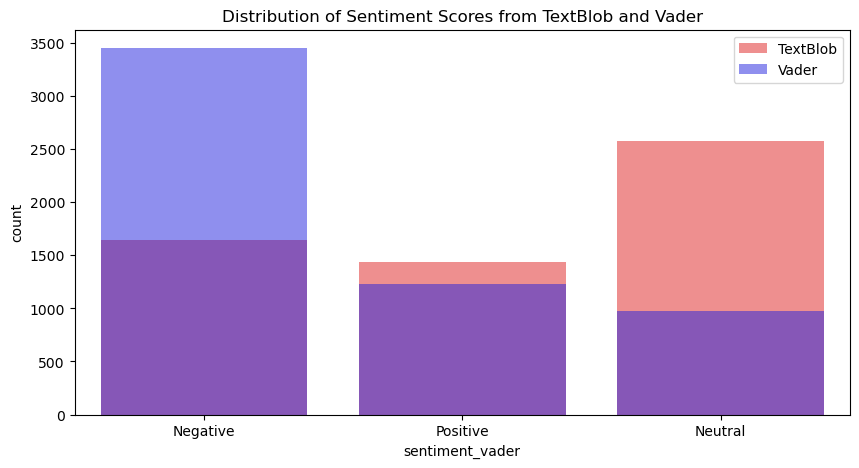

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x="sentiment_textblob", data= df , label="TextBlob", color='r', alpha=0.5)
sns.countplot(x="sentiment_vader", data= df , label="Vader", color='b', alpha=0.5)
plt.legend()
plt.title('Distribution of Sentiment Scores from TextBlob and Vader')
plt.show()

## Hurricane Sandy

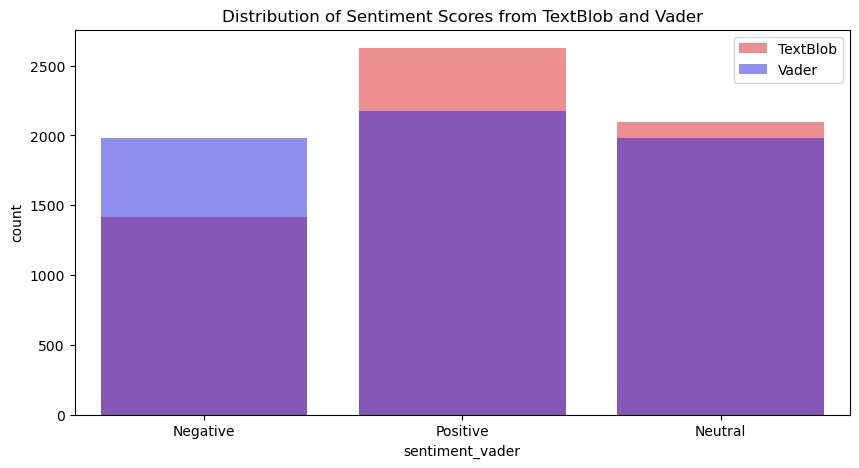

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(x="sentiment_textblob", data=df1, label="TextBlob", color='r', alpha=0.5)
sns.countplot(x="sentiment_vader", data=df1 , label="Vader", color='b', alpha=0.5)
plt.legend()
plt.title('Distribution of Sentiment Scores from TextBlob and Vader')
plt.show()

In [26]:
# ok  so I aint touching anything until I figure this sh out gl kadjhkjsahdashkhsaklkhdksah but that large asf portion is a sentiment analysis but I cant do over time bc for some reason this csv didn't include timestamps bc wtf

# Results/Findings

- lmao good luck

# Topic Modeling

- Aight add your explanations in here
- This a WIP I'm not sure it'll run but let's see

## Boston Bombing

In [27]:
# We will only use the 'text_cleaned' column for our analysis
documents = df['clean_text']

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(documents)

In [28]:
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(n_components=5, n_jobs=-1)

In [29]:
words = list(count_vectorizer.get_feature_names_out())
len(words)

6493

In [30]:
lda.components_.shape

(5, 6493)

In [31]:
# ok so we can either go with number_words or number_topics choose 1

In [32]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % (topic_idx+1))
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda, count_vectorizer, number_words)


Topic #1:
boston rt marathon prayforboston tragedy bombing prayers explosion bostonmarathon people

Topic #2:
boston bombing marathon rt news police bomb bostonstrong national suspect

Topic #3:
boston rt marathon bombing suspect suspects bomb breaking year bombings

Topic #4:
boston rt marathon bombing people bostonmarathon prayforboston suspects explosions bombs

Topic #5:
rt boston prayforboston bostonmarathon bombing stay safe don just did


In [33]:
# All i see are words and none of them make sense; jk I fixed it I had parameters too high

In [34]:
print_topics(lda, count_vectorizer, number_topics)


Topic #1:
boston rt marathon prayforboston tragedy

Topic #2:
boston bombing marathon rt news

Topic #3:
boston rt marathon bombing suspect

Topic #4:
boston rt marathon bombing people

Topic #5:
rt boston prayforboston bostonmarathon bombing


In [35]:
# Aight Visual Time

In [36]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.manifold import TSNE

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda.transform(count_data)):
    topic_weights.append([w for i, w in enumerate(row_list)])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5635 samples in 0.003s...
[t-SNE] Computed neighbors for 5635 samples in 0.267s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5635
[t-SNE] Computed conditional probabilities for sample 2000 / 5635
[t-SNE] Computed conditional probabilities for sample 3000 / 5635
[t-SNE] Computed conditional probabilities for sample 4000 / 5635
[t-SNE] Computed conditional probabilities for sample 5000 / 5635
[t-SNE] Computed conditional probabilities for sample 5635 / 5635
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.292110
[t-SNE] KL divergence after 1000 iterations: 0.408110


In [37]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

# Plot the Topic Clusters using Bokeh
output_notebook()
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(number_topics), 
              width=900, height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

Loading BokehJS ...

## Hurricane Sandy

In [38]:
# HS
# We will only use the 'text_cleaned' column for our analysis
documents1 = df1['clean_text']

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(documents1)

In [39]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % (topic_idx+1))
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda, count_vectorizer, number_topics)


Topic #1:
bedford ontario ignores mayer rtrtrtrt

Topic #2:
bedford bc ignores ontario keef

Topic #3:
bedford ontario ignores bc reassured

Topic #4:
bedford ontario ignores bc lolanthony

Topic #5:
ontario bedford mayer bells bc


In [40]:
output_notebook()
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(number_topics), 
              width=900, height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

Loading BokehJS ...

# Results

- Goodnight
- I'm out